<a href="https://colab.research.google.com/github/RahulArra/Machine-Learning/blob/main/week_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.tree import DecisionTreeRegressor , plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd

data = load_diabetes()

df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

print("DataFrame head:")
display(df.head())

x = df[data.feature_names].values
y = df['target'].values


DataFrame head:


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [23]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
bp,0
s1,0
s2,0
s3,0
s4,0
s5,0
s6,0


Decision Tree RMSE : 59.60


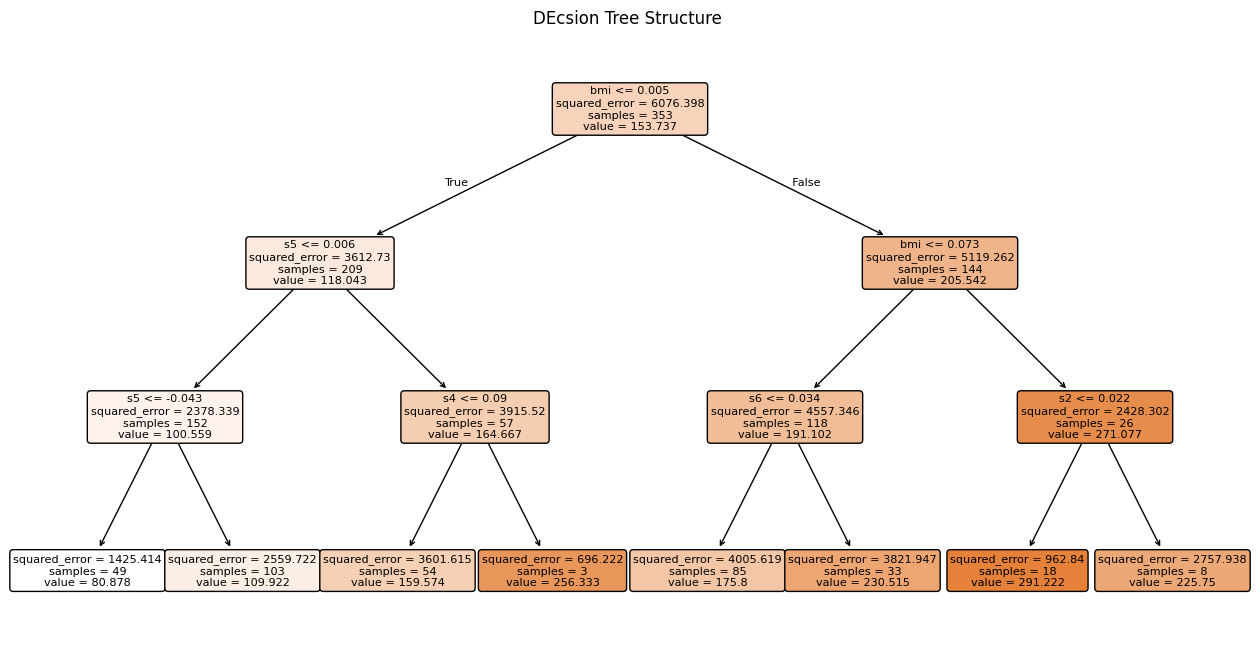

In [24]:
X_train , X_test , y_train , y_test = train_test_split(x,y,test_size =0.2, random_state =42)

tree_model = DecisionTreeRegressor(max_depth = 3 , random_state =42)
tree_model.fit(X_train,y_train)

y_pred = tree_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print(f"Decision Tree RMSE : { rmse:.2f}")

plt.figure(figsize=(16,8))
plot_tree(tree_model, feature_names=data.feature_names , filled = True , rounded = True)
plt.title("DEcsion Tree Structure ")

plt.show()

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder , StandardScaler
from sklearn.naive_bayes import GaussianNB , CategoricalNB
from sklearn.metrics import  classification_report , confusion_matrix , accuracy_score
df = pd.read_csv("/content/drive/MyDrive/KaggleDatasets/loan_data_set.csv")

In [26]:
print(df.head())
print(df.info())
print(df.isnull().sum())
print(df.shape)

    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0   

In [33]:
df.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [32]:
categorical_cols = ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Credit_History']
for col in categorical_cols:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].mode()[0])

numerical_cols = ['LoanAmount', 'Loan_Amount_Term']
for col in numerical_cols:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].median())

In [34]:
from sklearn.preprocessing import LabelEncoder


for col in df.columns :
  le = LabelEncoder()
  df[col] = le.fit_transform(df[col])
print("Encoder Dataset :")
print(df)


Encoder Dataset :
     Loan_ID  Gender  Married  Dependents  Education  Self_Employed  \
0          0       1        0           0          0              0   
1          1       1        1           1          0              0   
2          2       1        1           0          0              1   
3          3       1        1           0          1              0   
4          4       1        0           0          0              0   
..       ...     ...      ...         ...        ...            ...   
609      609       0        0           0          0              0   
610      610       1        1           3          0              0   
611      611       1        1           1          0              0   
612      612       1        1           2          0              0   
613      613       0        0           0          0              1   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0                376                  0         203     

In [29]:
X = df.drop(['Loan_Status', 'Loan_ID'], axis=1)
y = df['Loan_Status']

In [30]:
X_train , X_test , y_train, y_test = train_test_split(X,y , test_size=0.2 , random_state=42)


In [35]:
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [36]:
accuracy = accuracy_score(y_test,y_pred)
conf_matrix = confusion_matrix(y_test , y_pred)
class_report = confusion_matrix(y_test , y_pred)

print(f"Accuracy score : {accuracy:.2f}")
print("\nCOnfusion Matrix: ")
print(conf_matrix)
print("\nClassificatin matric")
print(class_report)

Accuracy score : 0.80

COnfusion Matrix: 
[[20 23]
 [ 2 78]]

Classificatin matric
[[20 23]
 [ 2 78]]


In [43]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix

cancer = load_breast_cancer()
df = pd.DataFrame(data= cancer.data , columns = cancer.feature_names)
df['target'] = cancer.target

X= df.drop("target",axis=1)
y=df["target"]

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state = 42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

svc_model = SVC(kernel="rbf",C=1.0,random_state = 42)
svc_model.fit(X_train_scaled,y_train)

y_pred= svc_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test,y_pred)
conf_matric = confusion_matrix(y_test,y_pred)
class_report = classification_report(y_test,y_pred,target_names=cancer.target_names)


print(f"SVC Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)


SVC Accuracy: 0.9825

Confusion Matrix:
[[20 23]
 [ 2 78]]

Classification Report:
              precision    recall  f1-score   support

   malignant       1.00      0.95      0.98        43
      benign       0.97      1.00      0.99        71

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [44]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

y_pred = knn.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, target_names=iris.target_names)

print(f"KNN Accuracy (K=5): {accuracy:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

KNN Accuracy (K=5): 1.0000

Confusion Matrix:
[[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      1.00      1.00        11
   virginica       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
columns = [
    'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang',
    'oldpeak', 'slope', 'ca', 'thal', 'target'
]
df = pd.read_csv(url, header=None, names=columns, na_values='?')

df.dropna(inplace=True)

df['target'] = (df['target'] > 0).astype(int)

X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "K-Nearest Neighbors (KNN)": KNeighborsClassifier(n_neighbors=7),
    "Support Vector Classifier (SVC)": SVC(),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}

for name, model in models.items():
    # Train the model
    model.fit(X_train_scaled, y_train)

    # Make predictions
    y_pred = model.predict(X_test_scaled)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    print(f"--- {name} ---")
    print(f"Accuracy: {accuracy:.4f}\n")
    print(classification_report(y_test, y_pred))

--- Logistic Regression ---
Accuracy: 0.8667

              precision    recall  f1-score   support

           0       0.89      0.89      0.89        36
           1       0.83      0.83      0.83        24

    accuracy                           0.87        60
   macro avg       0.86      0.86      0.86        60
weighted avg       0.87      0.87      0.87        60

--- K-Nearest Neighbors (KNN) ---
Accuracy: 0.8833

              precision    recall  f1-score   support

           0       0.91      0.89      0.90        36
           1       0.84      0.88      0.86        24

    accuracy                           0.88        60
   macro avg       0.88      0.88      0.88        60
weighted avg       0.88      0.88      0.88        60

--- Support Vector Classifier (SVC) ---
Accuracy: 0.8833

              precision    recall  f1-score   support

           0       0.89      0.92      0.90        36
           1       0.87      0.83      0.85        24

    accuracy              